<a href="https://colab.research.google.com/github/sanyamja1n/Mobile-Price-Range-Prediction/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Yaser Zaidi
##### **Team Member 2 -** Sanyam Jain
##### **Team Member 3 -** Shraddha Shandilya
##### **Team Member 4 -** Yaseer Khan
##### **Team Member 5 -** Abhishek Bhargava

# **Project Summary -**

In this colab, we have implemented a Mobile Price Prediction using different Machine Learning Algorithms. This project will classify the price range of the mobile price. The price ranges from 0-3. We’ll discuss the price range in the dataset. It's a classification problem. Now we have trained a mobile price classification using different ML algorithms. This model classifies the range of the mobile based on the different parameters like from camera, touch screen, cores, battery, clock speed, internal memory, battery capacity, etc. After training the model using different algorithms, we compared all the models.. 

# **GitHub Link -**

https://github.com/sanyamja1n/Mobile-Price-Range-Prediction


# **Problem Statement**


**Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.**

**The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Sample Data/data_mobile_price_range.csv")

pd.pandas.set_option('display.max_columns',None)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

Datatype of all features is either int or float.

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

There are 0 Null values.

### What did you know about your dataset?

Our dataset is consist of 21 columns and 2000 rows. The data contains information regarding mobile phone features, specifications, etc and their price range.

* Battery Power in mAh

* Has BlueTooth or not

* Microprocessor clock speed

* The phone has dual sim support or not

* Front Camera Megapixels

* Has 4G support or not

* Internal Memory in GigaBytes

* Mobile Depth in Cm

* Weight of Mobile Phone

* Number of cores in the processor

* Primary Camera Megapixels

* Pixel Resolution height

* Pixel resolution width

* RAM in MB

* Mobile screen height in cm

* Mobile screen width in cm

* Longest time after a single charge

* 3g or not

* Has touch screen or not

* Has wifi or not

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

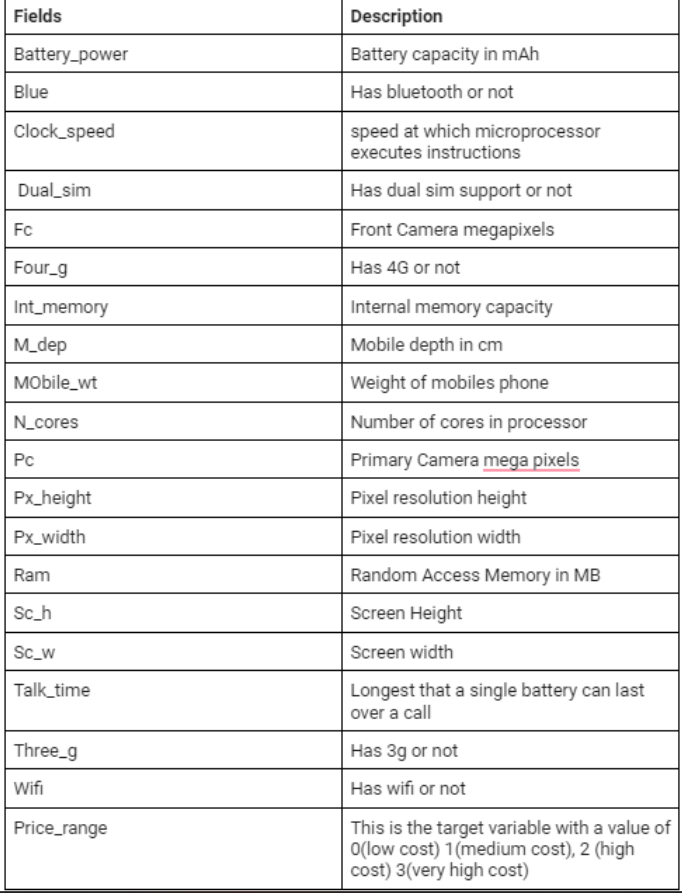

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

### Variables Description 


In [ ]:
# Dataset Describe
df.describe()

Here we can see that there are some entries in px_height and sc_w which are 0 and that is not possible so we will remove all these wrong data.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Removing all the entries with screen width = 0
df = df[df['sc_w'] != 0]
#Removing all the entries with pixel height = 0
df = df[df['px_height'] != 0]
df.shape

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Price range vs Ram

In [ ]:
sns.barplot(x=df['price_range'],y=df["ram"])
plt.title('Price range v/s Ram')

##### 1. Why did you pick the specific chart?

To check relation betwwen price range and Ram.

##### 2. What is/are the insight(s) found from the chart?

As the RAM size increases the price also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 2 Price Range vs Primary Camera

In [ ]:
sns.pointplot(y="pc", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation between price and Primary Camera.

##### 2. What is/are the insight(s) found from the chart?

With increase in primary camera mega pixels the price also increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 3 Price Range vs Number of Cores

In [ ]:

df.groupby(["price_range"])['n_cores'].value_counts().unstack().plot(kind = "bar",figsize=(20,8))
#plt.figure(figsize=(20,8))
plt.title('Price range v/s no. of cores')
plt.show()

##### 1. Why did you pick the specific chart?

To check connection between no. of cores and price range.

##### 2. What is/are the insight(s) found from the chart?

* In low range phones most mobiles have 8 cores.

* In medium range phones most mobiles have 1 or 4 cores.

* In high range phones most mobiles have 4 cores.

* In very high range phones most mobiles have 5 cores.

#### Chart - 4 Battery Power vs Price Range



In [ ]:
sns.pointplot(y="battery_power", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation b/w price range and battery.

##### 2. What is/are the insight(s) found from the chart?

Low range mobile phones have low battery capacity.

Medium and high range have almost equal battery power.

Very high range mobiles have high battery power.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 5 Internal memory vs Price range

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check the relation between price range and internal memory.

##### 2. What is/are the insight(s) found from the chart?

When we move to high range to very high range mobile the sudden increment in internal memory can be seen.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 6 Talk Time vs Price Range

In [ ]:
# Chart - 6 visualization code
sns.pointplot(y="talk_time", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation between talk time and price range.

##### 2. What is/are the insight(s) found from the chart?

* Low range phones have low talk time.

* Medium range phones have highest talk time.

* High and very high range phones have moderate talk time.

* This result is may be due to the more features in high range phones which drains more battery that's why it is possible to have low talk time while having high battery power.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 7 Mobile Weight vs Price Range

In [ ]:
sns.pointplot(y="mobile_wt", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check the relation between mobile weight and price range.

##### 2. What is/are the insight(s) found from the chart?

Very high range phones have very low weight.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 8 Pixel Height and Width vs Price Range

In [ ]:
# Chart - 8 visualization code
sns.pointplot(y="px_width", x="price_range", data=df)
plt.show()
sns.pointplot(y="px_height", x="price_range", data=df)

##### 1. Why did you pick the specific chart?

To check relation between Pixel Height and Width vs Price Range

##### 2. What is/are the insight(s) found from the chart?

Low range phones have low pixel height and width.

Medium and high range phones have moderate pixel height and width.

Very high range phones have high pixel height and width.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 9 Value Counts of different features

In [ ]:
# Chart - 9 visualization code
for i in ["blue",'dual_sim','four_g','n_cores','three_g','touch_screen','wifi','price_range']:
  df[i].value_counts().plot(kind = "pie",autopct='%1.1f%%')
  plt.show()

##### 1. Why did you pick the specific chart?

To examine value counts of different features.

##### 2. What is/are the insight(s) found from the chart?

76% phones have 3G while 24% do not and all other features are almost balanced.

#### Chart - 10 Correlation 

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True)

##### 1. Why did you pick the specific chart?

To check the multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

RAM is the most influential feature in price prediction.

3G & 4G, pixel height & width, screen height & width and front camera & primary camera are correlated which is obvious.

We will merge this columns in feature manipulation section.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help.

#### Chart - 11 Pair Plot

In [ ]:
# Chart - 11 visualization code
sns.pairplot(df, hue="price_range")

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# There are no missing values but there were some wrong entries which is already handled

### 2. Handling Outliers

In [ ]:
#Checking for outliers using boxplot
for i in list(df.columns):
  sns.boxplot(x=i,data=df)
  plt.show()

There aren't any outliers.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
dfn = df.copy()

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['Screen Size']= round(np.sqrt(df['sc_h']**2+df['sc_w']**2),2)

df['Pixels']=df['px_height']*df['px_width']

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df.drop(columns=["sc_h",'sc_w','px_height','px_width'],axis=1,inplace=True)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
X=df.drop(columns = ['price_range'])
y=df['price_range']

### 8. Data Splitting

In [ ]:
#train test split of data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why? 

Answer Here.

### 6. Data Scaling

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 9. Handling Imbalanced Dataset

We have a balanced dataset.

## ***7. ML Model Implementation***

### Function of Confusion matrix

In [ ]:
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

### ML Model - 1 Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)

print('Random Forest Classifier Test Accuracy Score: ',accuracy_score(y_test,y_pred_rf))
cm_rfc=my_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Random Forest Classifier has good test accuracy score of 86%.**

#### 2. Feature Importance

In [ ]:
feature = df.drop(columns = ["price_range"]).columns
importances = rf.feature_importances_


importance_dict = {'Feature' : list(feature),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)


importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
print(importance_df.sort_values(by=['Feature Importance'],ascending=False))

From here we can clearly see that the RAM is the most important feature.

### ML Model - 2 Naive Bayes Classifier

In [ ]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred_nb=nb.predict(X_test)

print('Gaussian Naive Bayes Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_nb))
cm_rfc=my_confusion_matrix(y_test, y_pred_nb, 'Gaussian Naive Bayes Confusion Matrix')

NB Classifier also have a good test accuracy score of 79%.

### ML Model - 3 KNN

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

KNN has got bad accuracy of only 39%.

### ML Model - 4 Support Vector Machine

In [ ]:
svmc = svm.SVC()

svmc.fit(X_train, y_train)
y_pred_svm=svmc.predict(X_test)

print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

SVM has a good accuracy score of 85%.

## ML Model - 5 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(fit_intercept=True, max_iter=10000)

LR.fit(X_train, y_train)
y_pred_LR=LR.predict(X_test)

print('Logistic Regression Accuracy Score: ',accuracy_score(y_test,y_pred_LR))
cm_rfc=my_confusion_matrix(y_test, y_pred_LR, 'LR Confusion Matrix')

It has a very good accuracy score of 88%.

### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# creating parameters

model = LogisticRegression()
penalty = ['l2','l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters are  \n",grid_search.best_params_)

# predit 
y_train_preds = grid_search.best_estimator_.predict(X_train)
y_test_preds = grid_search.best_estimator_.predict(X_test)

print("\n \n")
TrainAccuracy = accuracy_score(y_train,y_train_preds)


TestAccuracy= accuracy_score(y_test, y_test_preds)

print(f"Train_Accuracy  {TrainAccuracy}")
print(f"Test_Accuracy  {TestAccuracy}")

After applying hyperparameter tuning on Logistic Regression we got a very high test accuracy of 93%.

# **Conclusion**

In our analysis, we initially did EDA on all the features of our datset. We handled wrong entries in different variables. Then checked outliers in our dataset. Then dropped features that are of no use. Next found out the correlation, distribution and their relationship with the dependent variable. 


Next we implemented five machine learning algorithms random forest classifier, naive bayes classifier, KNN, Support vector machine and logistic regression. We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

* Random forest and logistic regression have high accuracy of 85% and 88%.

* After hyperparameter tuning on logistic regression the accuracy increases to 93%.

* RAM is the most influential feature.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***